In [14]:
from scipy.stats import bernoulli

bernoulli.rvs(p = 0.4, size = 100, random_state = 42)  

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

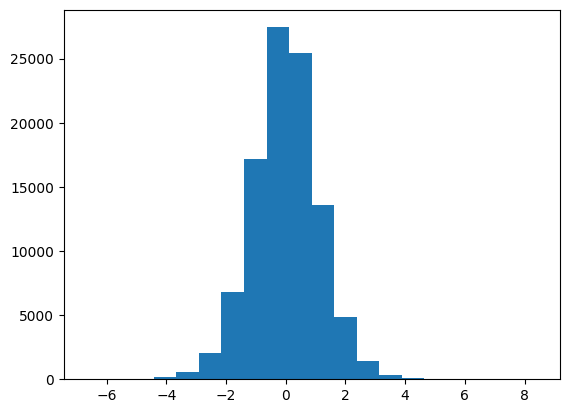

In [54]:
from scipy.stats import t
import matplotlib.pylab as plt

x = t.rvs(df = 10, loc = 0, scale = 1, size = 100000)
plt.hist(x, bins = 20)
plt.show()

In [58]:
t.stats(df = 5, loc = 0, scale = 1, moments = "mskv")

(0.0, 1.6666666666666667, 0.0, 6.0)

In [59]:
import yfinance as yf

df = yf.download("AAPL", period = "1y")  
df_close = df.loc[:, "Adj Close"]
df_returns = df_close.pct_change().dropna()
df_returns.head()

/Users/ralf/Library/Mobile Documents/com~apple~CloudDocs/Kurse/SCDP/.venv/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


Date
2023-05-23   -0.015155
2023-05-24    0.001632
2023-05-25    0.006692
2023-05-26    0.014105
2023-05-30    0.010660
Name: Adj Close, dtype: float64

In [66]:
df_returns.apply(lambda x: 0.01 <= x <= 0.03).mean()

0.17928286852589642

In [73]:
df_returns.apply(lambda x: x <= -0.05).mean()

0.0

In [69]:
nu, l, s = t.fit(df_returns)

In [71]:
t.cdf(0.03, df = nu, loc = l, scale = s) - t.cdf(0.01, df = nu, loc = l, scale = s) 

0.17836310011583767

In [75]:
t.cdf(-0.05, df = nu, loc = l, scale = s)

0.0017519676027008618

In [76]:
t.ppf(0.01, df = nu, loc = l, scale = s)

-0.03245620190752099

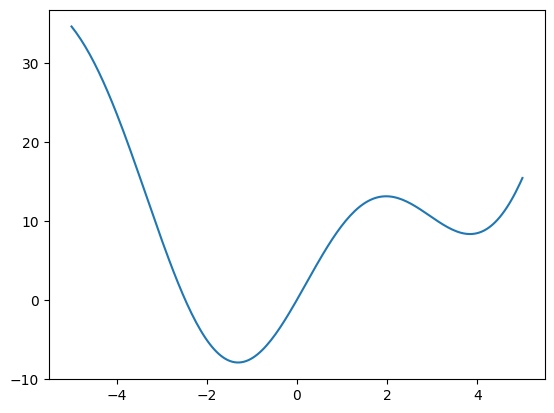

In [77]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pylab as plt

def objective_function(x):
    return x**2 + 10 * np.sin(x)

x = np.linspace(-5, 5, 200)
plt.plot(x, objective_function(x))
plt.show()

In [96]:
from scipy.optimize import minimize, differential_evolution

def f(x):
    return x**2 + 10 * np.sin(x)

minimize(f, x0 = 2)
differential_evolution(f, bounds = [(-10, 10)])

             message: Optimization terminated successfully.
             success: True
                 fun: -7.945823375615284
                   x: [-1.306e+00]
                 nit: 6
                nfev: 113
          population: [[-1.301e+00]
                       [-1.090e+00]
                       ...
                       [-1.373e+00]
                       [-1.259e+00]]
 population_energies: [-7.946e+00 -7.679e+00 ... -7.920e+00 -7.933e+00]
                 jac: [ 8.882e-08]

2.6666666666666665

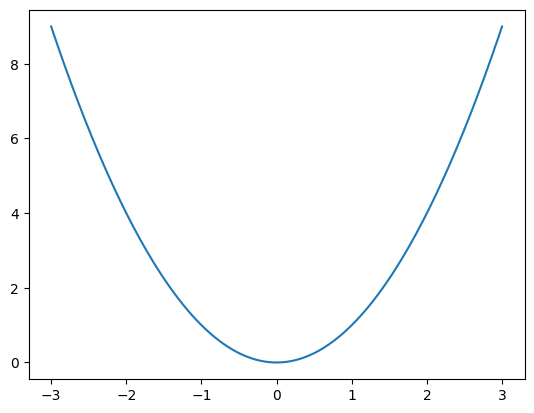

In [99]:
f = lambda x: x**2
x = np.linspace(-3, 3, 200)

plt.plot(x, f(x))

1/3 * 0**3 - 1/3 * -2**3

In [101]:
from scipy.integrate import quad

value, error = quad(f, a = -2, b = 0)
value

2.6666666666666665